In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D


In [79]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Distribution Of Annual Income 

Text(16.819444444444443, 0.5, 'count')

<Figure size 1000x600 with 0 Axes>

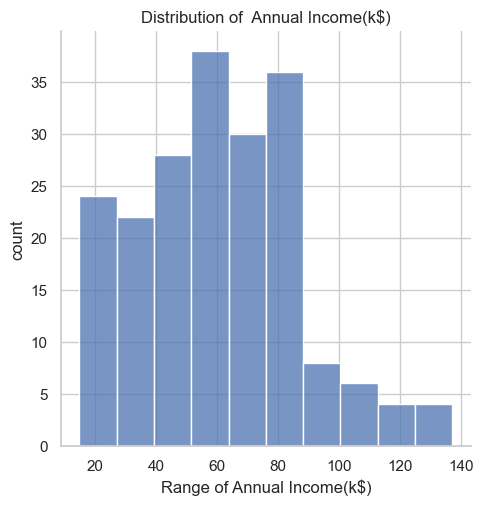

In [81]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.displot(data['Annual Income (k$)'])
plt.title("Distribution of  Annual Income(k$)")
plt.xlabel("Range of Annual Income(k$)")
plt.ylabel("count")

Distribution Of Age 

Text(16.819444444444443, 0.5, 'count')

<Figure size 1000x600 with 0 Axes>

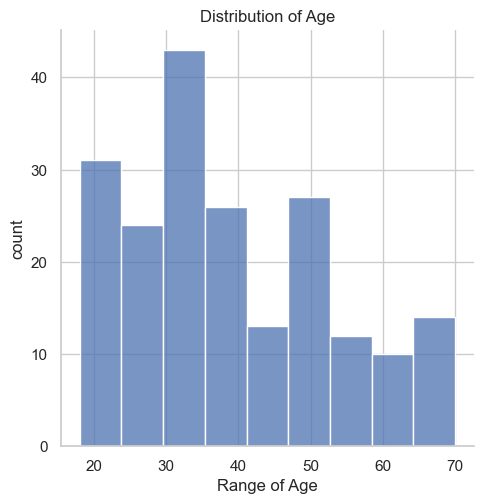

In [82]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.displot(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("count")

Distribution of Spending Score 

Text(16.819444444444443, 0.5, 'count')

<Figure size 1000x600 with 0 Axes>

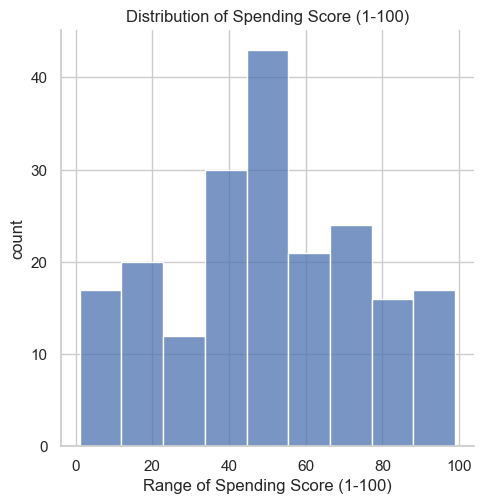

In [83]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.displot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Range of Spending Score (1-100)")
plt.ylabel("count")

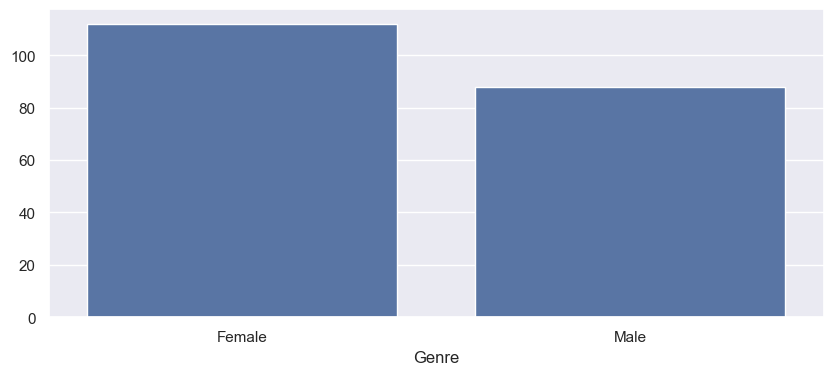

In [84]:
gender = data.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x= gender.index , y = gender.values)
plt.show()

In [85]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [86]:
df = data[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


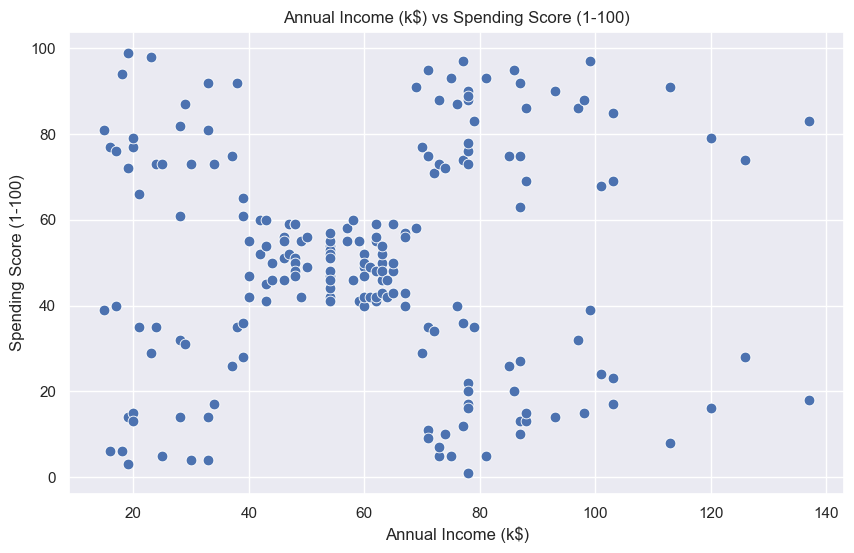

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, s=60)
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [88]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)



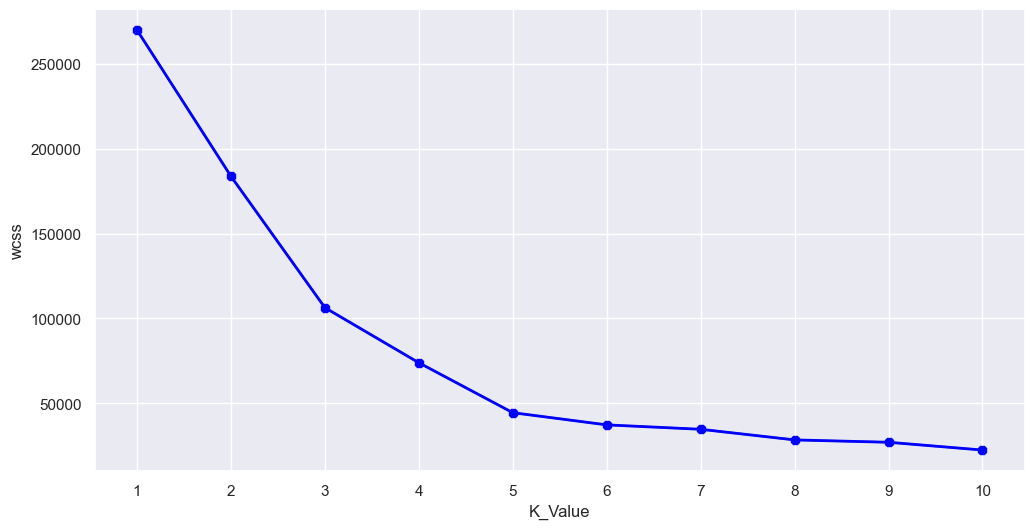

In [89]:
plt.figure(figsize= (12,6))
plt.plot(range(1,11)  , wcss)
plt.plot(range(1,11), wcss , linewidth = 2, color = "blue", marker = "8")
plt.xlabel("K_Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel('wcss')
plt.show()

In [90]:
km1 = KMeans(n_clusters=5)
km1.fit(X)
y = km1.predict(X)
df["label"] = y
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


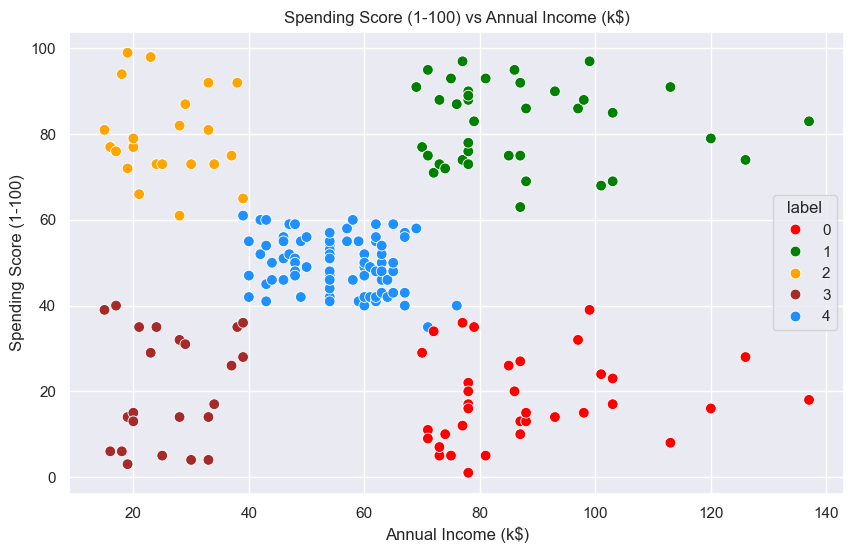

In [91]:
plt.figure(figsize= (10,6))
sns.scatterplot(x= 'Annual Income (k$)', y = 'Spending Score (1-100)' , hue= "label",
                palette=['red', 'green' ,'orange','brown', 'dodgerblue'], legend= 'full', data = df, s = 60)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score (1-100) vs Annual Income (k$)")
plt.show()

In [92]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Clustering on the basis of 3D Data

In [93]:
df2 = data[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
X2 = df2[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [98]:
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters=i , init="k-means++")
    km.fit(X2)
    wcss.append(km.inertia_)

In [ ]:
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(111 , projection= '3d')
ax.scatter()

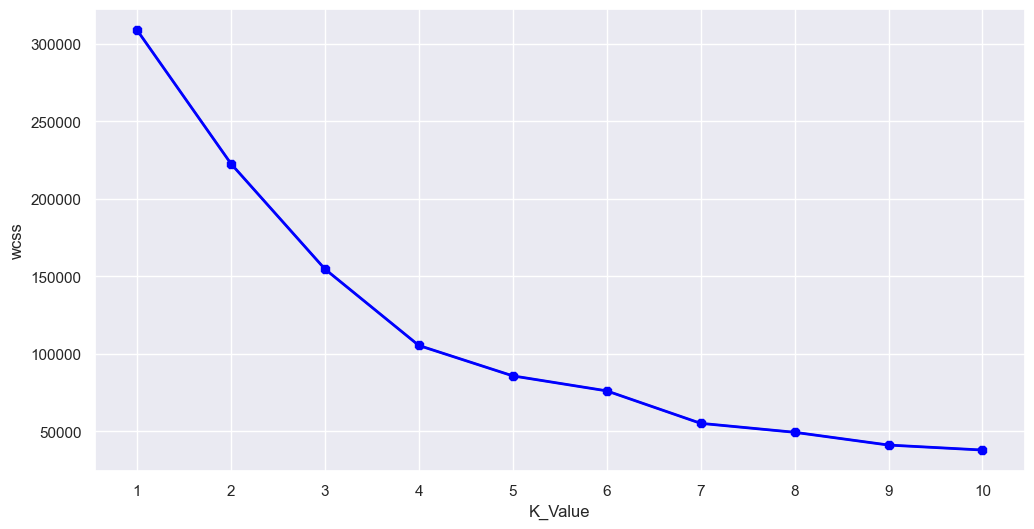

In [99]:
plt.figure(figsize= (12,6))
plt.plot(range(1,11)  , wcss)
plt.plot(range(1,11), wcss , linewidth = 2, color = "blue", marker = "8")
plt.xlabel("K_Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel('wcss')
plt.show()

In [100]:
km2 = KMeans(n_clusters=5)
km2.fit(X2)
y2 = km2.predict(X2)
df2["label"] = y2
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


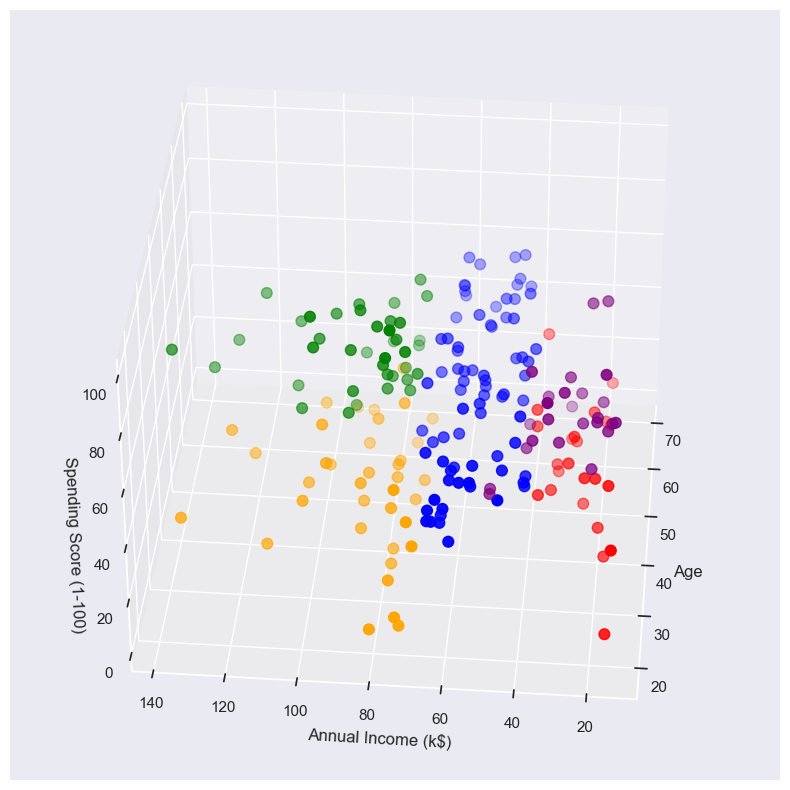

In [101]:
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(df2.Age[df2.label == 0], df2['Annual Income (k$)'][df2.label == 0], df2['Spending Score (1-100)'][df2.label == 0], c = 'purple', s = 60)
ax.scatter(df2.Age[df2.label == 1], df2['Annual Income (k$)'][df2.label == 1], df2['Spending Score (1-100)'][df2.label == 1], c = 'red', s = 60)
ax.scatter(df2.Age[df2.label == 2], df2['Annual Income (k$)'][df2.label == 2], df2['Spending Score (1-100)'][df2.label == 2], c = 'green', s = 60)
ax.scatter(df2.Age[df2.label == 3], df2['Annual Income (k$)'][df2.label == 3], df2['Spending Score (1-100)'][df2.label == 3], c = 'blue', s = 60)
ax.scatter(df2.Age[df2.label == 4], df2['Annual Income (k$)'][df2.label == 4], df2['Spending Score (1-100)'][df2.label == 4], c = 'orange', s = 60)

ax.view_init(35,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()